In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
client_stock = pd.read_csv("./data/client_stock.csv")
local_stock = pd.read_csv("./data/mexico_local_stock.csv")

cocoa = pd.read_csv("./data/cocoa_beans_per_metric_ton.csv")
corn = pd.read_csv("./data/corn_price_per_metric_ton.csv")
cotton = pd.read_csv("./data/cotton_price_per_pound.csv")
rubber = pd.read_csv("./data/rubber_price_per_pound.csv")
sugar = pd.read_csv("./data/sugar_price_per_pound.csv")

diesel = pd.read_csv("./data/diesel_price_per_gallon.csv")
gasoline = pd.read_csv("./data/gasoline_price_per_gallon.csv")

demand = pd.read_csv("./data/demand_formatted.csv")

In [3]:
client_stock = client_stock.rename(columns={"Unnamed: 0": "DATE"})
client_stock["DATE"] = pd.to_datetime(client_stock["DATE"])

In [4]:
local_stock = local_stock.rename(columns={"Unnamed: 0": "DATE"})
local_stock["DATE"] = pd.to_datetime(local_stock["DATE"])

In [5]:
cocoa = cocoa.rename(columns={"Month": "DATE"})
cocoa["DATE"] = pd.to_datetime(cocoa["DATE"])
cocoa["Price"] = cocoa["Price"].map(lambda c: c.replace(",",""))
cocoa["Price"] = cocoa["Price"].astype(float)
cocoa = cocoa.rename(columns={"Price": "Cocoa"})
del cocoa["Change"]

In [6]:
corn = corn.rename(columns={"Month": "DATE"})
corn["DATE"] = pd.to_datetime(corn["DATE"])
corn["Price"] = corn["Price"].map(lambda c: c.replace(",",""))
corn["Price"] = corn["Price"].astype(float)
corn = corn.rename(columns={"Price": "Corn"})
del corn["Change"]

In [7]:
cotton = cotton.rename(columns={"Month": "DATE"})
cotton["DATE"] = pd.to_datetime(cotton["DATE"])
cotton = cotton.rename(columns={"Price": "Cotton"})
del cotton["Change"]

In [8]:
rubber = rubber.rename(columns={"Month": "DATE"})
rubber["DATE"] = pd.to_datetime(rubber["DATE"])
rubber = rubber.rename(columns={"Price": "Rubber"})
del rubber["Change"]

In [9]:
sugar = sugar.rename(columns={"Month": "DATE"})
sugar["DATE"] = pd.to_datetime(sugar["DATE"])
sugar = sugar.rename(columns={"Price": "Sugar"})
del sugar["Change"]

In [10]:
diesel = diesel.rename(columns={"Month": "DATE"})
diesel["DATE"] = pd.to_datetime(diesel["DATE"])
diesel = diesel.rename(columns={"Price": "Diesel"})
del diesel["Change"]

In [11]:
gasoline = gasoline.rename(columns={"Month": "DATE"})
gasoline["DATE"] = pd.to_datetime(gasoline["DATE"])
gasoline = gasoline.rename(columns={"Price": "Gasoline"})
del gasoline["Change"]

In [12]:
demand["DATE"] = pd.to_datetime(demand["DATE"])

In [13]:
# demand.groupby(["DATE","PRODUCT"]).sum()
total_demand = demand.groupby(["DATE","PRODUCT"]).sum()
total_demand = total_demand.reset_index()

In [14]:
total_demand.head()

,DATE,PRODUCT,DEMAND
0,2000-01-01,TOTAL Diesel,1255097
1,2000-01-01,TOTAL Magna,2221120
2,2000-01-01,TOTAL Premium,263004
3,2000-02-01,TOTAL Diesel,1310000
4,2000-02-01,TOTAL Magna,2188110


In [15]:
total_demand.to_csv("./data/output/total_demand.csv")

# stock

In [16]:
# aggregate stock price for min, max, and avg

In [17]:
stock = client_stock.merge(local_stock, on="DATE")

In [18]:
stock.to_csv("./data/output/all_stock_daily.csv")

In [19]:
# def month_year_iter( start_month, start_year, end_month, end_year ):
#     ym_start= 12*start_year + start_month - 1
#     ym_end= 12*end_year + end_month - 1
#     for ym in range( ym_start, ym_end ):
#         y, m = divmod( ym, 12 )
# #         print y, m+1
#         yield y, m+1

In [20]:
# print demand.DATE.max().year, demand.DATE.max().month + 1

In [21]:
# months = month_year_iter(1, 2000, demand.DATE.max().month + 1, demand.DATE.max().year)

In [22]:
# monthly_stocks = pd.DataFrame()
# for m in months:
#     stock[(stock["DATE"].year == m[0]) & (stock["DATE"].month == m[1])]
# #     print m[0], m[1]
# #     print dt.date(m[0], m[1], 1)

In [23]:
# str(2015) + str(1) + str(02)

In [24]:
# stock[(stock["DATE"] > "2015-01-01") & (stock["DATE"] <= "2015-02-01")]

In [25]:
stock.head()

,DATE,BP,CVX,XOM,XOM.1,RDS.A,RDS.B,AMX,CX,FMX,ALFAA,PAC,BIMBOA,GISSAA,ANB,SANMEXB,SIEN,AZTECACPO,TV,WALMEX
0,1999-07-21,57.0000,NaN,39.0625,39.0625,NaN,NaN,NaN,NaN,13.4449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.8906,NaN
1,1999-07-22,56.5313,NaN,39.0938,39.0938,NaN,NaN,NaN,NaN,13.2576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6875,NaN
2,1999-07-23,57.0313,NaN,39.5625,39.5625,NaN,NaN,NaN,NaN,12.4043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0938,NaN
3,1999-07-26,55.8750,NaN,39.0000,39.0000,NaN,NaN,NaN,NaN,11.8007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6563,NaN
4,1999-07-27,56.7500,NaN,38.7813,38.7813,NaN,NaN,NaN,NaN,11.8423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9219,NaN


In [26]:
stock["YEAR"] = stock["DATE"].apply(lambda x: x.year)
stock["MONTH"] = stock["DATE"].apply(lambda x: x.month)

In [27]:
monthly_stocks_avg = stock.groupby(["YEAR","MONTH"]).mean().reset_index()
monthly_stocks_min = stock.groupby(["YEAR","MONTH"]).min().reset_index()
monthly_stocks_max = stock.groupby(["YEAR","MONTH"]).max().reset_index()

In [28]:
monthly_stocks_avg["DATE"] = monthly_stocks_avg.apply(lambda x: dt.date(int(x.YEAR), int(x.MONTH), 1), axis=1)
monthly_stocks_min["DATE"] = monthly_stocks_min.apply(lambda x: dt.date(int(x.YEAR), int(x.MONTH), 1), axis=1)
monthly_stocks_max["DATE"] = monthly_stocks_max.apply(lambda x: dt.date(int(x.YEAR), int(x.MONTH), 1), axis=1)

In [29]:
monthly_stocks_avg["DATE"] = pd.to_datetime(monthly_stocks_avg["DATE"])
monthly_stocks_min["DATE"] = pd.to_datetime(monthly_stocks_min["DATE"])
monthly_stocks_max["DATE"] = pd.to_datetime(monthly_stocks_max["DATE"])

In [30]:
del monthly_stocks_avg["YEAR"]
del monthly_stocks_avg["MONTH"]
del monthly_stocks_min["YEAR"]
del monthly_stocks_min["MONTH"]
del monthly_stocks_max["YEAR"]
del monthly_stocks_max["MONTH"]

In [31]:
monthly_stocks_avg.head()

,BP,CVX,XOM,XOM.1,RDS.A,RDS.B,AMX,CX,FMX,ALFAA,PAC,BIMBOA,GISSAA,ANB,SANMEXB,SIEN,AZTECACPO,TV,WALMEX,DATE
0,56.949237,NaN,39.199237,39.199237,NaN,NaN,NaN,NaN,12.222150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.107438,NaN,1999-07-01
1,58.209536,NaN,40.430786,40.430786,NaN,NaN,NaN,NaN,11.373095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.497255,NaN,1999-08-01
2,55.254490,NaN,38.818476,38.818476,NaN,NaN,NaN,11.263383,10.362648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.219505,NaN,1999-09-01
3,55.830357,NaN,36.839300,36.839300,NaN,NaN,NaN,10.652790,10.678810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.114600,NaN,1999-10-01
4,58.511905,NaN,38.501510,38.501510,NaN,NaN,NaN,11.703010,12.510314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.981414,NaN,1999-11-01


In [32]:
monthly_stocks_min.head()

,DATE,BP,CVX,XOM,XOM.1,RDS.A,RDS.B,AMX,CX,FMX,ALFAA,PAC,BIMBOA,GISSAA,ANB,SANMEXB,SIEN,AZTECACPO,TV,WALMEX
0,1999-07-01,55.8750,NaN,38.7813,38.7813,NaN,NaN,NaN,NaN,11.4469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5938,NaN
1,1999-08-01,55.1875,NaN,38.9063,38.9063,NaN,NaN,NaN,NaN,10.9058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0156,NaN
2,1999-09-01,52.8750,NaN,37.3438,37.3438,NaN,NaN,NaN,10.9676,9.8235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4844,NaN
3,1999-10-01,52.8125,NaN,35.8750,35.8750,NaN,NaN,NaN,9.4351,9.9484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.2188,NaN
4,1999-11-01,52.3125,NaN,35.3125,35.3125,NaN,NaN,NaN,10.9976,10.9474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5938,NaN


In [33]:
monthly_stocks_max.head()

,DATE,BP,CVX,XOM,XOM.1,RDS.A,RDS.B,AMX,CX,FMX,ALFAA,PAC,BIMBOA,GISSAA,ANB,SANMEXB,SIEN,AZTECACPO,TV,WALMEX
0,1999-07-01,57.9375,NaN,39.6875,39.6875,NaN,NaN,NaN,NaN,13.4449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.8906,NaN
1,1999-08-01,59.6250,NaN,41.4063,41.4063,NaN,NaN,NaN,NaN,12.0296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1250,NaN
2,1999-09-01,57.9375,NaN,40.6250,40.6250,NaN,NaN,NaN,11.5986,11.0514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0313,NaN
3,1999-10-01,58.4375,NaN,38.4375,38.4375,NaN,NaN,NaN,11.6287,11.4677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6250,NaN
4,1999-11-01,61.4375,NaN,40.5313,40.5313,NaN,NaN,NaN,12.2596,13.2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4531,NaN


In [34]:
monthly_stocks_avg.to_csv("./data/output/monthly_stocks_avg.csv")

# commodities

In [35]:
commodities = [cocoa, corn, cotton, rubber, sugar]
product = [diesel, gasoline]

In [36]:
commodities = reduce(lambda left,right: pd.merge(left,right,on='DATE'), commodities)

In [37]:
commodities.head()

,DATE,Cocoa,Corn,Cotton,Rubber,Sugar
0,1997-06-01,13464.28,895.01,6.40,4.01,0.91
1,1997-07-01,13122.54,832.52,6.35,3.33,0.91
2,1997-08-01,12840.59,871.64,6.32,3.23,0.91
3,1997-09-01,13735.33,873.17,6.20,3.07,0.88
4,1997-10-01,14590.42,1007.61,6.52,3.32,0.95


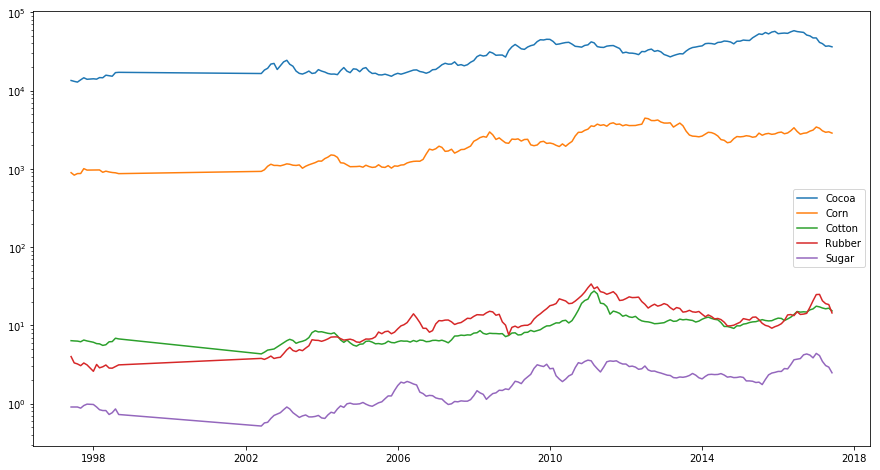

In [38]:
# commodities.plot(figsize=(15,8), logy=True)
plt.subplots(figsize=(15,8))
plt.semilogy(commodities["DATE"], commodities[["Cocoa","Corn","Cotton","Rubber","Sugar"]])
plt.legend(["Cocoa","Corn","Cotton","Rubber","Sugar"])
plt.show()

# all data

In [39]:
print commodities.DATE.min()
print commodities.DATE.max()
print monthly_stocks_avg.DATE.min()
print monthly_stocks_avg.DATE.max()

1997-06-01 00:00:00
2017-06-01 00:00:00
1999-07-01 00:00:00
2017-07-01 00:00:00


In [40]:
monthly_data = pd.merge(commodities, monthly_stocks_avg, on='DATE', how="outer")
monthly_data.to_csv("./data/output/all_data_monthly.csv")

In [41]:
print monthly_data.DATE.min()
print monthly_data.DATE.max()

1997-06-01 00:00:00
2017-07-01 00:00:00


In [42]:
cols = [c for c in monthly_data.columns.values if c not in ["DATE"]]
print cols

['Cocoa', 'Corn', 'Cotton', 'Rubber', 'Sugar', 'BP', 'CVX', 'XOM', 'XOM.1', 'RDS.A', 'RDS.B', 'AMX', 'CX', 'FMX', 'ALFAA', 'PAC', 'BIMBOA', 'GISSAA', 'ANB', 'SANMEXB', 'SIEN', 'AZTECACPO', 'TV', 'WALMEX']


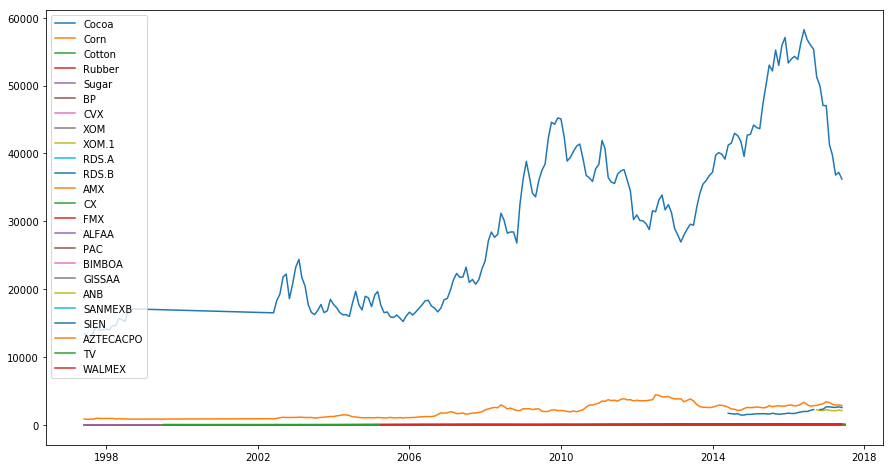

In [43]:
# monthly_data.plot(figsize=(15,8))
plt.subplots(figsize=(15,8))
plt.plot(monthly_data["DATE"], monthly_data[cols])
plt.legend(cols)
plt.show()

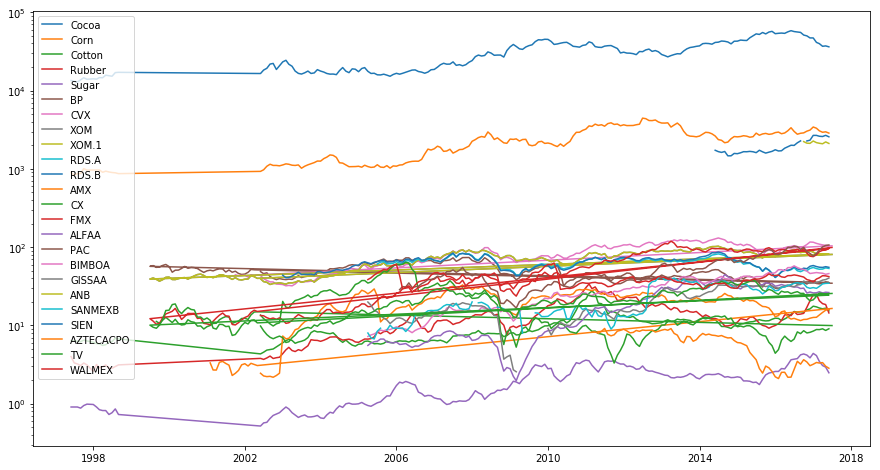

In [44]:
# monthly_data.plot(figsize=(15,8), logy=True)
plt.subplots(figsize=(15,8))
plt.semilogy(monthly_data["DATE"], monthly_data[cols])
plt.legend(cols)
plt.show()

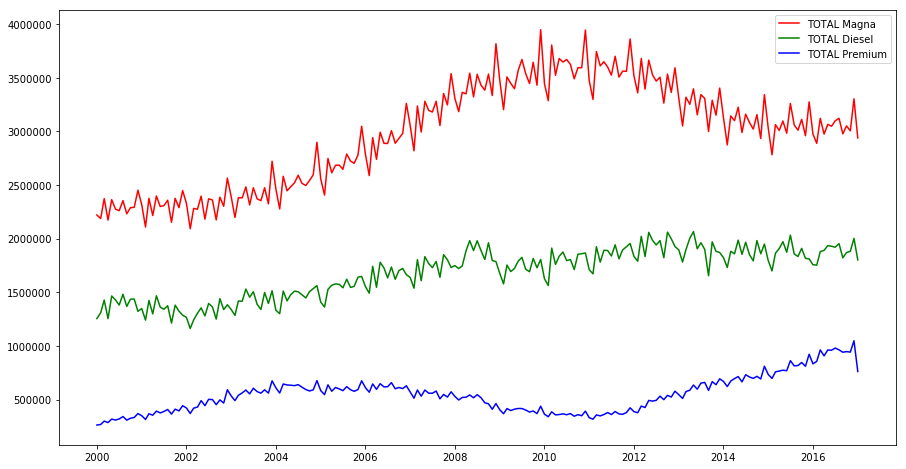

In [45]:
plt.subplots(figsize=(15,8))
plt.plot(total_demand[total_demand["PRODUCT"] == "TOTAL Diesel"]["DATE"], total_demand[total_demand["PRODUCT"] == "TOTAL Magna"]["DEMAND"], color="red")
plt.plot(total_demand[total_demand["PRODUCT"] == "TOTAL Diesel"]["DATE"], total_demand[total_demand["PRODUCT"] == "TOTAL Diesel"]["DEMAND"], color="green")
plt.plot(total_demand[total_demand["PRODUCT"] == "TOTAL Diesel"]["DATE"], total_demand[total_demand["PRODUCT"] == "TOTAL Premium"]["DEMAND"], color="blue")
plt.legend(["TOTAL Magna","TOTAL Diesel","TOTAL Premium"])
plt.show()
# total_demand.plot(x="DATE", y=[], figsize=(15, 8))

# DO MORE EDA!!!

In [46]:
monthly_data.head()

,DATE,Cocoa,Corn,Cotton,Rubber,Sugar,BP,CVX,XOM,XOM.1,...,ALFAA,PAC,BIMBOA,GISSAA,ANB,SANMEXB,SIEN,AZTECACPO,TV,WALMEX
0,1997-06-01,13464.28,895.01,6.40,4.01,0.91,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-07-01,13122.54,832.52,6.35,3.33,0.91,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-08-01,12840.59,871.64,6.32,3.23,0.91,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-09-01,13735.33,873.17,6.20,3.07,0.88,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-10-01,14590.42,1007.61,6.52,3.32,0.95,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# total_demand[["DATE","PRODUCT","DEMAND"]].pivot(index="DATE", columns="PRODUCT")
total_demand_pivot = total_demand[["DATE","PRODUCT","DEMAND"]].pivot_table(index="DATE", columns="PRODUCT", values="DEMAND").reset_index()

In [48]:
all_data_monthly = pd.merge(monthly_data, total_demand_pivot, on='DATE').sort_values("DATE")

In [49]:
all_data_monthly.to_csv("./data/output/data_and_demand_monthly.csv")

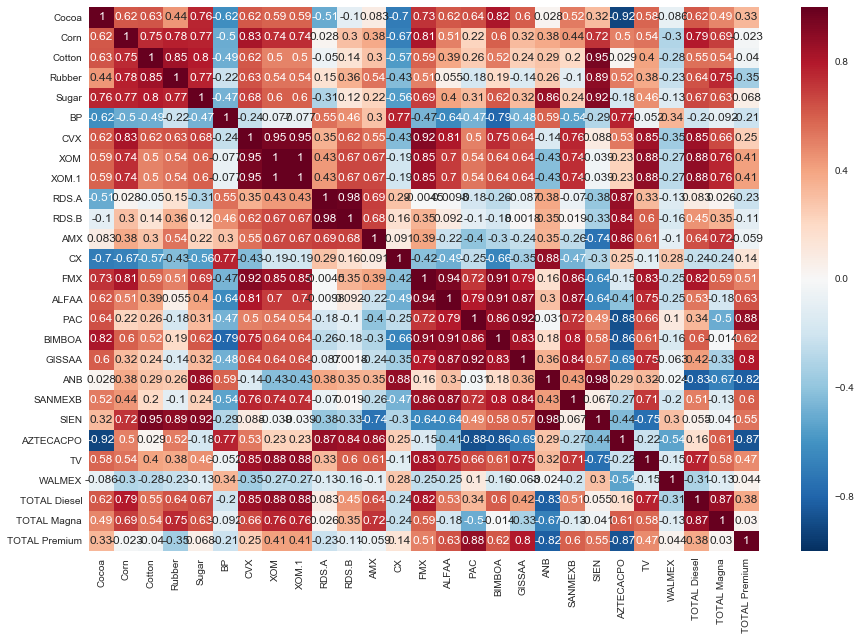

In [50]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(all_data_monthly.corr(), ax=ax, annot=True)

# Random Forest

In [51]:
from sklearn.model_selection import train_test_split 

In [52]:
all_data_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 176 to 175
Data columns (total 28 columns):
DATE             205 non-null datetime64[ns]
Cocoa            176 non-null float64
Corn             176 non-null float64
Cotton           176 non-null float64
Rubber           176 non-null float64
Sugar            176 non-null float64
BP               205 non-null float64
CVX              184 non-null float64
XOM              205 non-null float64
XOM.1            205 non-null float64
RDS.A            139 non-null float64
RDS.B            169 non-null float64
AMX              192 non-null float64
CX               205 non-null float64
FMX              205 non-null float64
ALFAA            142 non-null float64
PAC              132 non-null float64
BIMBOA           142 non-null float64
GISSAA           133 non-null float64
ANB              4 non-null float64
SANMEXB          132 non-null float64
SIEN             31 non-null float64
AZTECACPO        71 non-null float64
TV              

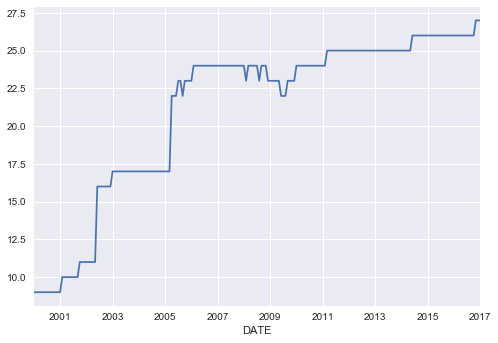

In [53]:
all_data_monthly.groupby("DATE").count().apply(lambda x: sum(x), axis=1).plot()

In [54]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 30

In [55]:
all_data_monthly[all_data_monthly["DATE"] > "2005-03-01"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 34 to 175
Data columns (total 28 columns):
DATE             142 non-null datetime64[ns]
Cocoa            142 non-null float64
Corn             142 non-null float64
Cotton           142 non-null float64
Rubber           142 non-null float64
Sugar            142 non-null float64
BP               142 non-null float64
CVX              142 non-null float64
XOM              142 non-null float64
XOM.1            142 non-null float64
RDS.A            139 non-null float64
RDS.B            142 non-null float64
AMX              142 non-null float64
CX               142 non-null float64
FMX              142 non-null float64
ALFAA            142 non-null float64
PAC              132 non-null float64
BIMBOA           142 non-null float64
GISSAA           133 non-null float64
ANB              4 non-null float64
SANMEXB          132 non-null float64
SIEN             31 non-null float64
AZTECACPO        71 non-null float64
TV               

In [56]:
all_data_monthly = all_data_monthly[all_data_monthly["DATE"] > "2005-06-01"]
del all_data_monthly["ANB"]
del all_data_monthly["SIEN"]
del all_data_monthly["AZTECACPO"]

del all_data_monthly["GISSAA"]
del all_data_monthly["SANMEXB"]
del all_data_monthly["PAC"]

In [57]:
all_data_monthly["YEAR"] = all_data_monthly["DATE"].apply(lambda x: x.year)
all_data_monthly["MONTH"] = all_data_monthly["DATE"].apply(lambda x: x.month)
del all_data_monthly["DATE"]

In [58]:
cols = [c for c in all_data_monthly if "TOTAL" not in c]
print cols

['Cocoa', 'Corn', 'Cotton', 'Rubber', 'Sugar', 'BP', 'CVX', 'XOM', 'XOM.1', 'RDS.A', 'RDS.B', 'AMX', 'CX', 'FMX', 'ALFAA', 'BIMBOA', 'TV', 'WALMEX', 'YEAR', 'MONTH']


In [59]:
train_size = 0.9
print int(len(all_data_monthly) * train_size)

125


In [60]:
# do not use random state
# X_train, X_test, y_train, y_test = train_test_split(all_data_monthly[cols], all_data_monthly["TOTAL Diesel"], train_size=train_size)
# X_train, X_test, y_train, y_test = train_test_split(all_data_monthly[cols], all_data_monthly["TOTAL Magna"], train_size=train_size)
# X_train, X_test, y_train, y_test = train_test_split(all_data_monthly[cols], all_data_monthly["TOTAL Premium"], train_size=train_size)

In [61]:
target = "TOTAL Diesel" # r2 = 0.34
target = "TOTAL Magna" # r2 = -5.8
target = "TOTAL Premium" # r2 = -6.5

In [62]:
# early and late split
X_train = all_data_monthly[cols].head(int(round(all_data_monthly.shape[0] * train_size)))
y_train = all_data_monthly[target].head(int(round(all_data_monthly.shape[0] * train_size)))
X_test  = all_data_monthly[cols].tail(int(round(all_data_monthly.shape[0] * (1. - train_size))))
y_test  = all_data_monthly[target].tail(int(round(all_data_monthly.shape[0] * (1. - train_size))))

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print rfr.score(X_train, y_train)

0.98889286947


In [65]:
rfr.score(X_test, y_test)

-8.0833810180272696

In [66]:
rfr.predict(X_test)

array([ 821813.7,  802432.7,  804827.9,  787368.8,  769513.7,  758126.1,
        763086.9,  795016.8,  791395.3,  730736.9,  733530.7,  719660.2,
        596059.2,  569814.2])

In [67]:
y_test

162     922984
163     833783
164     856140
165     963246
166     907657
167     962882
168     960136
169     980834
170     963707
171     941534
172     947565
173     942889
174    1048690
175     761769
Name: TOTAL Premium, dtype: int64

In [68]:
X_train.columns.values

array(['Cocoa', 'Corn', 'Cotton', 'Rubber', 'Sugar', 'BP', 'CVX', 'XOM',
       'XOM.1', 'RDS.A', 'RDS.B', 'AMX', 'CX', 'FMX', 'ALFAA', 'BIMBOA',
       'TV', 'WALMEX', 'YEAR', 'MONTH'], dtype=object)

In [69]:
rfr.feature_importances_

array([ 0.12482802,  0.01099096,  0.010635  ,  0.15527924,  0.00326169,
        0.01146709,  0.04267398,  0.00067687,  0.01591298,  0.0015342 ,
        0.04664457,  0.00815044,  0.07146244,  0.00644535,  0.08870078,
        0.35960341,  0.00583854,  0.00238593,  0.02897752,  0.004531  ])

In [70]:
pd.DataFrame(rfr.feature_importances_, index=X_train.columns.values).sort(0, ascending=False)

/Users/anthony-mba/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0
BIMBOA,0.359603
Rubber,0.155279
Cocoa,0.124828
ALFAA,0.088701
CX,0.071462
RDS.B,0.046645
CVX,0.042674
YEAR,0.028978
XOM.1,0.015913
BP,0.011467


# ARMA

[class example](http://localhost:8888/notebooks/DSI-SF-6/unit-10/timeseries_arma_lesson/timeseries-arma.ipynb#autoregressive-ar-models)

In [71]:
total_demand.head()

,DATE,PRODUCT,DEMAND
0,2000-01-01,TOTAL Diesel,1255097
1,2000-01-01,TOTAL Magna,2221120
2,2000-01-01,TOTAL Premium,263004
3,2000-02-01,TOTAL Diesel,1310000
4,2000-02-01,TOTAL Magna,2188110


In [72]:
total_demand["Diesel_1"] = total_demand[total_demand["PRODUCT"] == "TOTAL Diesel"]["DEMAND"].diff()
total_demand["Magna_1"] = total_demand[total_demand["PRODUCT"] == "TOTAL Magna"]["DEMAND"].diff()
total_demand["Premium_1"] = total_demand[total_demand["PRODUCT"] == "TOTAL Premium"]["DEMAND"].diff()

In [73]:
total_demand.head(9)

,DATE,PRODUCT,DEMAND,Diesel_1,Magna_1,Premium_1
0,2000-01-01,TOTAL Diesel,1255097,NaN,NaN,NaN
1,2000-01-01,TOTAL Magna,2221120,NaN,NaN,NaN
2,2000-01-01,TOTAL Premium,263004,NaN,NaN,NaN
3,2000-02-01,TOTAL Diesel,1310000,54903.0,NaN,NaN
4,2000-02-01,TOTAL Magna,2188110,NaN,-33010.0,NaN
5,2000-02-01,TOTAL Premium,267846,NaN,NaN,4842.0
6,2000-03-01,TOTAL Diesel,1427792,117792.0,NaN,NaN
7,2000-03-01,TOTAL Magna,2373716,NaN,185606.0,NaN
8,2000-03-01,TOTAL Premium,299435,NaN,NaN,31589.0


In [74]:
from statsmodels.tsa.arima_model import ARMA
import pyflux as pf

In [75]:
# DIESEL
udiff = total_demand[total_demand["PRODUCT"] == "TOTAL Diesel"]
udiff = total_demand["Diesel_1"]
udiff.dropna(inplace=True) # drop null value from first difference, lag=1
date_ticks = total_demand[total_demand["PRODUCT"] == "TOTAL Diesel"]["DATE"]

In [76]:
# MAGNA
udiff = total_demand[total_demand["PRODUCT"] == "TOTAL Magna"]
udiff = total_demand["Magna_1"]
udiff.dropna(inplace=True) # drop null value from first difference, lag=1
date_ticks = total_demand[total_demand["PRODUCT"] == "TOTAL Magna"]["DATE"]

In [77]:
# PREMIUM
udiff = total_demand[total_demand["PRODUCT"] == "TOTAL Premium"]
udiff = total_demand["Premium_1"]
udiff.dropna(inplace=True) # drop null value from first difference, lag=1
date_ticks = total_demand[total_demand["PRODUCT"] == "TOTAL Premium"]["DATE"]

In [78]:
# A: ar(p), ma(q)    (p,q) = changing the lag each of the models
ar1 = ARMA(udiff.values, (1,0)).fit() 
ma1 = ARMA(udiff.values, (0,1)).fit()
arima = ARMA(udiff.values, (1,1)).fit()
ar2 = ARMA(udiff.values, (2,1)).fit() # best model? 
# i difference factor make it the arIma model

In [79]:
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  204
Model:                     ARMA(1, 0)   Log Likelihood               -2458.906
Method:                       css-mle   S.D. of innovations          41506.258
Date:                Tue, 25 Jul 2017   AIC                           4923.812
Time:                        18:15:21   BIC                           4933.767
Sample:                             0   HQIC                          4927.839
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3012.4489   1865.987      1.614      0.108      -644.818  6669.716
ar.L1.y       -0.5604      0.066     -8.504      0.000        -0.690    -0.431
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7845           +0.0000j            1.7845            0.5000
-----------------------------------------------------------------------------
"""

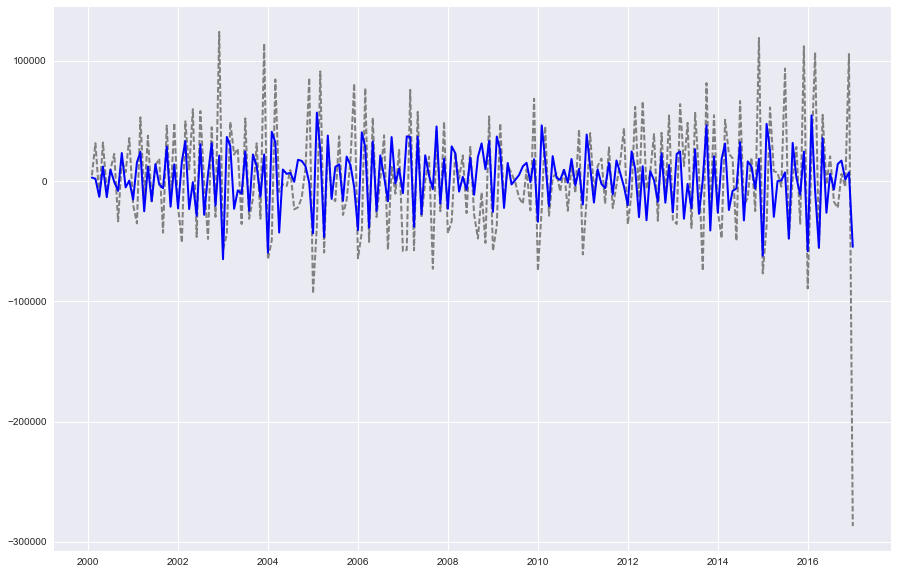

In [80]:
# udiff: difference where lag = 1 month
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(date_ticks[1:], udiff, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], ar1.fittedvalues, lw=2, color='blue')
plt.show()

In [81]:
from sklearn.metrics import r2_score
print r2_score(udiff, ar1.fittedvalues)
print r2_score(udiff, ma1.fittedvalues)
print r2_score(udiff, arima.fittedvalues)
print r2_score(udiff, ar2.fittedvalues)

0.26177869825
0.301044742383
0.331191150548
0.347471725529


In [82]:
# LAG = 1
# DIESEL
0.285523473898
0.383999931348
0.384249700445
0.391266173354
# MAGNA
0.317455623774
0.474917680819
0.507372523336
0.527192756652
# PREMIUM
0.26177869825
0.301044742383
0.331191150548
0.347471725529

0.347471725529

# ARIMA

In [83]:
from statsmodels.tsa.arima_model import ARIMA

In [84]:
predictions1 = list()
model = ARIMA(udiff.values, order=(5,2,1))
model_fit = model.fit(disp=0, solver='nm')
output = model_fit.forecast()
y_hat = output[0]
predictions1.append(y_hat)
# obsv = test[item]
# hist.append(obsv)

In [85]:
predictions1

[array([ 123871.4438955])]

In [86]:
# need to adjust
r2_score(udiff[1:], ARIMA(udiff.values, order=(1,1,1)).fit().fittedvalues)

-0.55031900674761824

In [87]:
# for item in range(len(test)):
#     model = ARIMA(hist, order=(5,2,1))
#     model_fit = model.fit(disp=0, solver='nm')
#     output = model_fit.forecast()
#     y_hat = output[0]
#     predictions1.append(y_hat)
#     obsv = test[item]
#     hist.append(obsv)